In [ ]:
#Настало время последнего мини-проекта в блоке Python! В нём вы поработаете с API и узнаете, как ведут себя 
#пользователи на сайте Яндекс.Метрики.

#Так как мы работаем с демо данными Яндекс.Метрики, нам позволено видеть данные только за последнюю неделю. Это 
#требует обновления заданий и ответов на них каждую неделю, что не очень удобно и вам, и нам. Поэтому для удобства 
#проверки мы решили немного модифицировать степы: теперь для того, чтобы ответить на вопросы, вам необходимо 
#поработать с уже выгруженными датасетами из Яндекс.Метрики. Но вы можете самостоятельно повторить каждый из 
#запросов в задании к реальному API Яндекс.Метрики, чтобы потренироваться и получить данные в таком же формате, 
#как в прикрепленном к задаче датасете.

In [2]:
import pandas as pd
import seaborn as sns

In [2]:
#Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением 
#количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика

In [3]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_1_lesson_7.csv')

In [21]:
df

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


In [24]:
df_sec = df.groupby(['date', 'user_type'], as_index =False) \
    .agg({'visits':'sum'})
df_sec

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


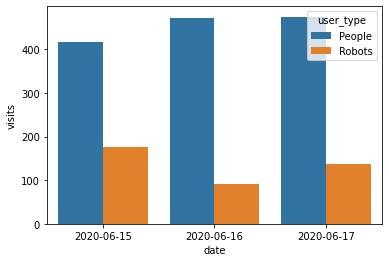

In [25]:
sns.barplot(x=df_sec.date, y=df_sec.visits, hue = df_sec.user_type)

In [26]:
#Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome

In [27]:
df2 = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_2_lesson_7.csv')

In [43]:
#всего посещений браузеров
df2.visits.sum()

594.0

In [33]:
df2

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [42]:
#посещение через браузер гугл хром
df2.query('browser == "Google Chrome"').visits.sum()

354.0

In [1]:
#узнать процент посещений через гугл хром
round(354/594*100)

60

In [6]:
#Давайте выясним, с какого браузера приходит больше всего ботов. Посмотрите на данные и 
#определите, у какого браузера самая большая доля посещений сайта ботами от общего числа 
#посещений в этом браузере?

df3 = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_3_lesson_7.csv')
df3.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [14]:
df_full = df3.groupby(['browser'], as_index=False)\
    .agg({'visits':'sum'}) \
    

In [18]:
df_full = df3.merge(df_full, on='browser', how='inner')

In [23]:
df_full.assign(perc=round(df_full.visits_x/df_full.visits_y*100)).sort_values('perc', ascending=False)

,date,browser,user_type,visits_x,visits_y,perc
23,2020-06-15,CocCoc,People,1.0,1.0,100.0
22,2020-06-15,Vivaldi,People,1.0,1.0,100.0
21,2020-06-15,Yandex: mobile app,People,1.0,1.0,100.0
18,2020-06-15,Android Browser,People,1.0,1.0,100.0
6,2020-06-15,Chrome Mobile,People,31.0,31.0,100.0
15,2020-06-15,UCWEB,Robots,4.0,4.0,100.0
9,2020-06-15,Mobile Safari,People,15.0,16.0,94.0
13,2020-06-15,Samsung Internet,People,8.0,9.0,89.0
2,2020-06-15,Yandex Browser,People,47.0,54.0,87.0
16,2020-06-15,Edge,People,4.0,5.0,80.0


In [ ]:
#Выгрузите данные, содержащие информацию о дне, типе пользователя, браузере. Создайте 
#колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

#В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с 
#точностью до 1 знака после точки.

In [8]:
df4 = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_4_lesson_7.csv')

In [9]:
#создаем функцию, где для каждой строчки находится доля из всей суммы визитов, округляем до десятых
df4 = df4.assign(perc = round(df4.visits / df4.visits.sum()*100,1))

In [ ]:
#При помощи библиотеки gspread отправьте данные из предыдущего шага в Google SpreadSheet. #
#Далее отправьте ссылку на получившийся файл в Google SpreadSheet (не забудьте открыть 
#доступ по ссылке, это можно сделать вручную, когда данные уже зальются в таблицу) при 
#помощи VK API себе в личку ВКонтакте. 

In [3]:
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd

import vk_api
import os
import requests
import json 
import random

In [4]:
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']
my_mail = 'makhatyrov.viktor@gmail.com'
#загружаем апишку в json file
credentials = ServiceAccountCredentials.from_json_keyfile_name('buoyant-chain-414213-2fd2ca6980fa.json', scope)

In [5]:
#авторизируемся по ней в google sheet
gs = gspread.authorize(credentials)

In [24]:
# Создаю новую таблицы, в клоторую нужно будет отправить датафрэйм
table_name = 'Sheet'
sheet = gs.create(table_name)

# делаю видимым ее для себя
sheet.share('makhatyrov.viktor@gmail.com', perm_type='user', role='writer')
#и получаю ссылку на этот файл
spreadsheet_url = "https://docs.google.com/spreadsheets/d/%s" % sheet.id

In [27]:
#ссылка на вновь созданный эксель
spreadsheet_url

'https://docs.google.com/spreadsheets/d/1sqcic9VLgGYNbYQ5twmKQVWdpwu-c1fZXz_Rybruj7Y'

In [25]:
#загружем датафрейм из предыдущего задания
d2g.upload(df4, table_name, 'Sheet1', credentials=credentials, row_names=True)

<Worksheet 'Sheet1' id:0>

Скришнот с эксель файла


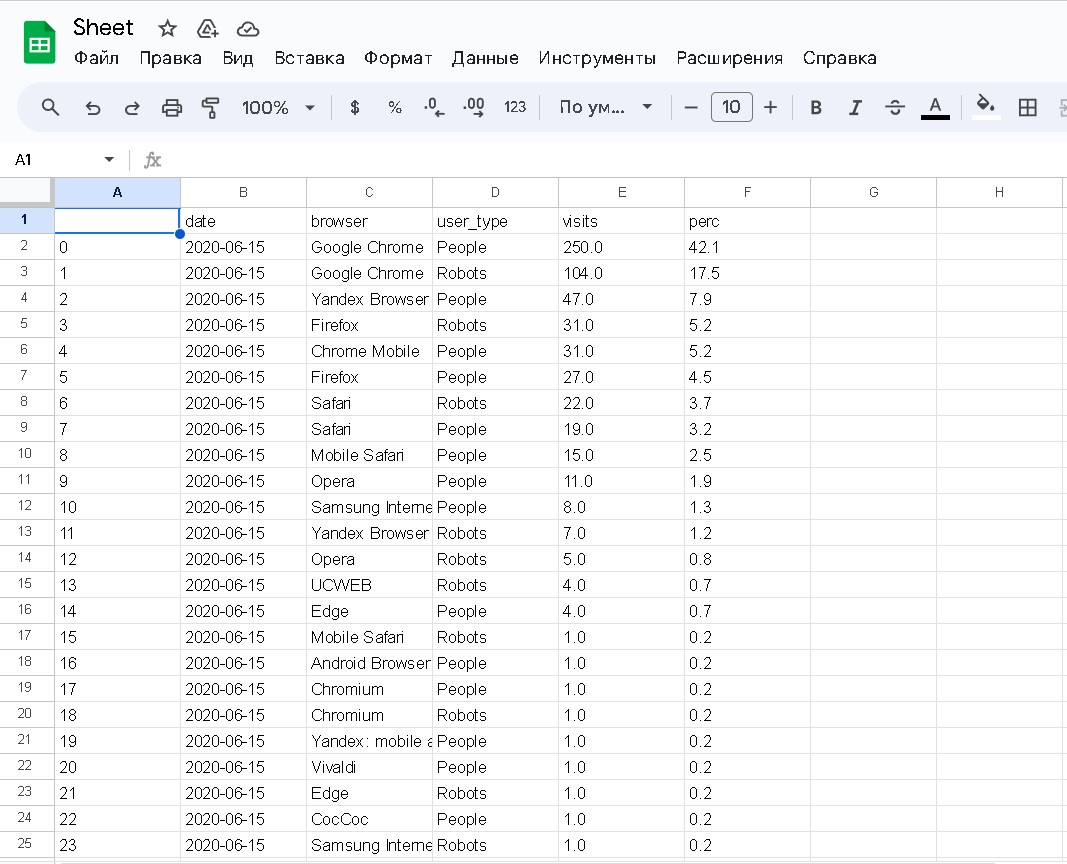

In [28]:
#как видимо датафрейм загрузился в эксель файл
from IPython.display import Image
print('Скришнот с эксель файла')
Image("/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-mahatyrov/lessons/lesson7. API/Screenshot_3.jpg", width=320, height=240) 

In [18]:
#импортируем модули чтобы отправить ссылку на эксель файл в VK
import vk_api
import os
import requests
import json 
import random

In [30]:
#авторизуемся через апи в vk
token = 'vk1.a.KYEnrP3b9mhzJdvSgRhpdgaYsanr5RESR0JGvNfVr51b_fMLEuir_AQyX0gNjOT0BQTGnKGwyPn9L0X397QzoILw-I0LKFtRMLJpDbIQIlcyNJcSvjF_L3beAdcF9SsYd6bl7ZQ4i4xl3mTlFNIFHN0o_FqIcJxWdqN4VVXpFvYBqQUoxwf5isfyfgeMveMVed2_JyI3OAeAsZIOTeoQiw'
vk_session = vk_api.VkApi(token = token)
vk = vk_session.get_api()


In [32]:
#отправялем сообщение
vk.messages.send(
    chat_id=1,
    random_id=3,
    message=spreadsheet_url
)

0

In [ ]:
#Другой аналитик уже агрегировал часть данных из метрики. Вам нужно объединить усилия, чтобы получить финальный 
#отчет. Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага 
#с таблицей аналитика и посчитайте количество визитов на человека (отношение visits к users) в разрезе по браузеру
#и значениям Robots/People.

#В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome 
#(округлите до целого)

In [36]:
#считываем данные с экселя по ссылке
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df5 = pd.read_csv(BytesIO(data))

In [40]:
df_common = df4.merge(df5, on=['date', 'browser', 'user_type'], how ='inner')

In [41]:
df_common.head(10)

,date,browser,user_type,visits,perc,users
0,2020-06-15,Google Chrome,People,250.0,42.1,240.0
1,2020-06-15,Google Chrome,Robots,104.0,17.5,104.0
2,2020-06-15,Yandex Browser,People,47.0,7.9,44.0
3,2020-06-15,Firefox,Robots,31.0,5.2,29.0
4,2020-06-15,Chrome Mobile,People,31.0,5.2,30.0
5,2020-06-15,Firefox,People,27.0,4.5,26.0
6,2020-06-15,Safari,Robots,22.0,3.7,20.0
7,2020-06-15,Safari,People,19.0,3.2,17.0
8,2020-06-15,Mobile Safari,People,15.0,2.5,14.0
9,2020-06-15,Opera,People,11.0,1.9,10.0


In [45]:
df_common.assign(visits_to_users = round(df_common.visits/ df_common.users, 2))

,date,browser,user_type,visits,perc,users,visits_to_users
0,2020-06-15,Google Chrome,People,250.0,42.1,240.0,1.04
1,2020-06-15,Google Chrome,Robots,104.0,17.5,104.0,1.00
2,2020-06-15,Yandex Browser,People,47.0,7.9,44.0,1.07
3,2020-06-15,Firefox,Robots,31.0,5.2,29.0,1.07
4,2020-06-15,Chrome Mobile,People,31.0,5.2,30.0,1.03
5,2020-06-15,Firefox,People,27.0,4.5,26.0,1.04
6,2020-06-15,Safari,Robots,22.0,3.7,20.0,1.10
7,2020-06-15,Safari,People,19.0,3.2,17.0,1.12
8,2020-06-15,Mobile Safari,People,15.0,2.5,14.0,1.07
9,2020-06-15,Opera,People,11.0,1.9,10.0,1.10
